# Code Overview: Data Loading and Inspection

1. **Libraries Used**:
   - `pandas`: For data manipulation and analysis.
   - `matplotlib.pyplot`: For visualizations (though not used yet in this snippet).

2. **Steps Performed**:
   - Loaded the dataset `default of credit card clients.csv` using `pandas` into a DataFrame called `credit_card_data`.
   - Inspected the dataset by displaying the first few rows using the `head()` method.

3. **Purpose**:
   - To understand the structure of the dataset and inspect its contents for further analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file to inspect its contents
file_path_csv = 'default of credit card clients.csv'
credit_card_data = pd.read_csv(file_path_csv)

# Display the first few rows of the dataset
credit_card_data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Code Overview: Enhanced EDA with Cleaned Data

1. **Libraries Used**:
   - `seaborn`: For aesthetically pleasing statistical data visualization.
   - `matplotlib.pyplot`: For figure customization and layout adjustments.

2. **Steps Performed**:
   - **Data Cleaning**:
     - Removed rows where `EDUCATION` or `MARRIAGE` values are marked as `0` (Unknown), to focus analysis on known categories.
   - **EDA Function**:
     - Defined a function `plot_eda_charts_clean(data)` to visualize key features in the dataset:
       - **Gender Distribution**: Visualized using a count plot, categorized as Male or Female.
       - **Education Distribution**: Visualized using a count plot, excluding unknown categories (`0`).
       - **Marriage Status Distribution**: Count plot for categories like Married, Single, or Others.
       - **Age Distribution**: Histogram with KDE (Kernel Density Estimation) to visualize the age distribution.
       - **Credit Limit Distribution**: Histogram with KDE to analyze credit limits (`LIMIT_BAL`).
       - **Default Payment Next Month**: Count plot showing the proportion of defaulters (Yes) and non-defaulters (No).
   - **Visualization Style**:
     - Used `sns.set_style("whitegrid")` for consistent and clean visual aesthetics.

3. **Purpose**:
   - To perform a comprehensive exploratory data analysis (EDA) after cleaning the dataset by removing rows with unknown categories.
   - To better understand the distributions and relationships of key features in the dataset, excluding noise from unknown data.

4. **Outputs**:
   - Visualizations providing insights into demographic features, financial metrics, and default behavior, adjusted for cleaned data.



/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/3257409172.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=data, ax=axes[0, 0], palette='coolwarm')
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/3257409172.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Male', 'Female'])
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/3257409172.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EDUCATION', data=data, ax=axes[0, 1], palette='coolwarm')
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971

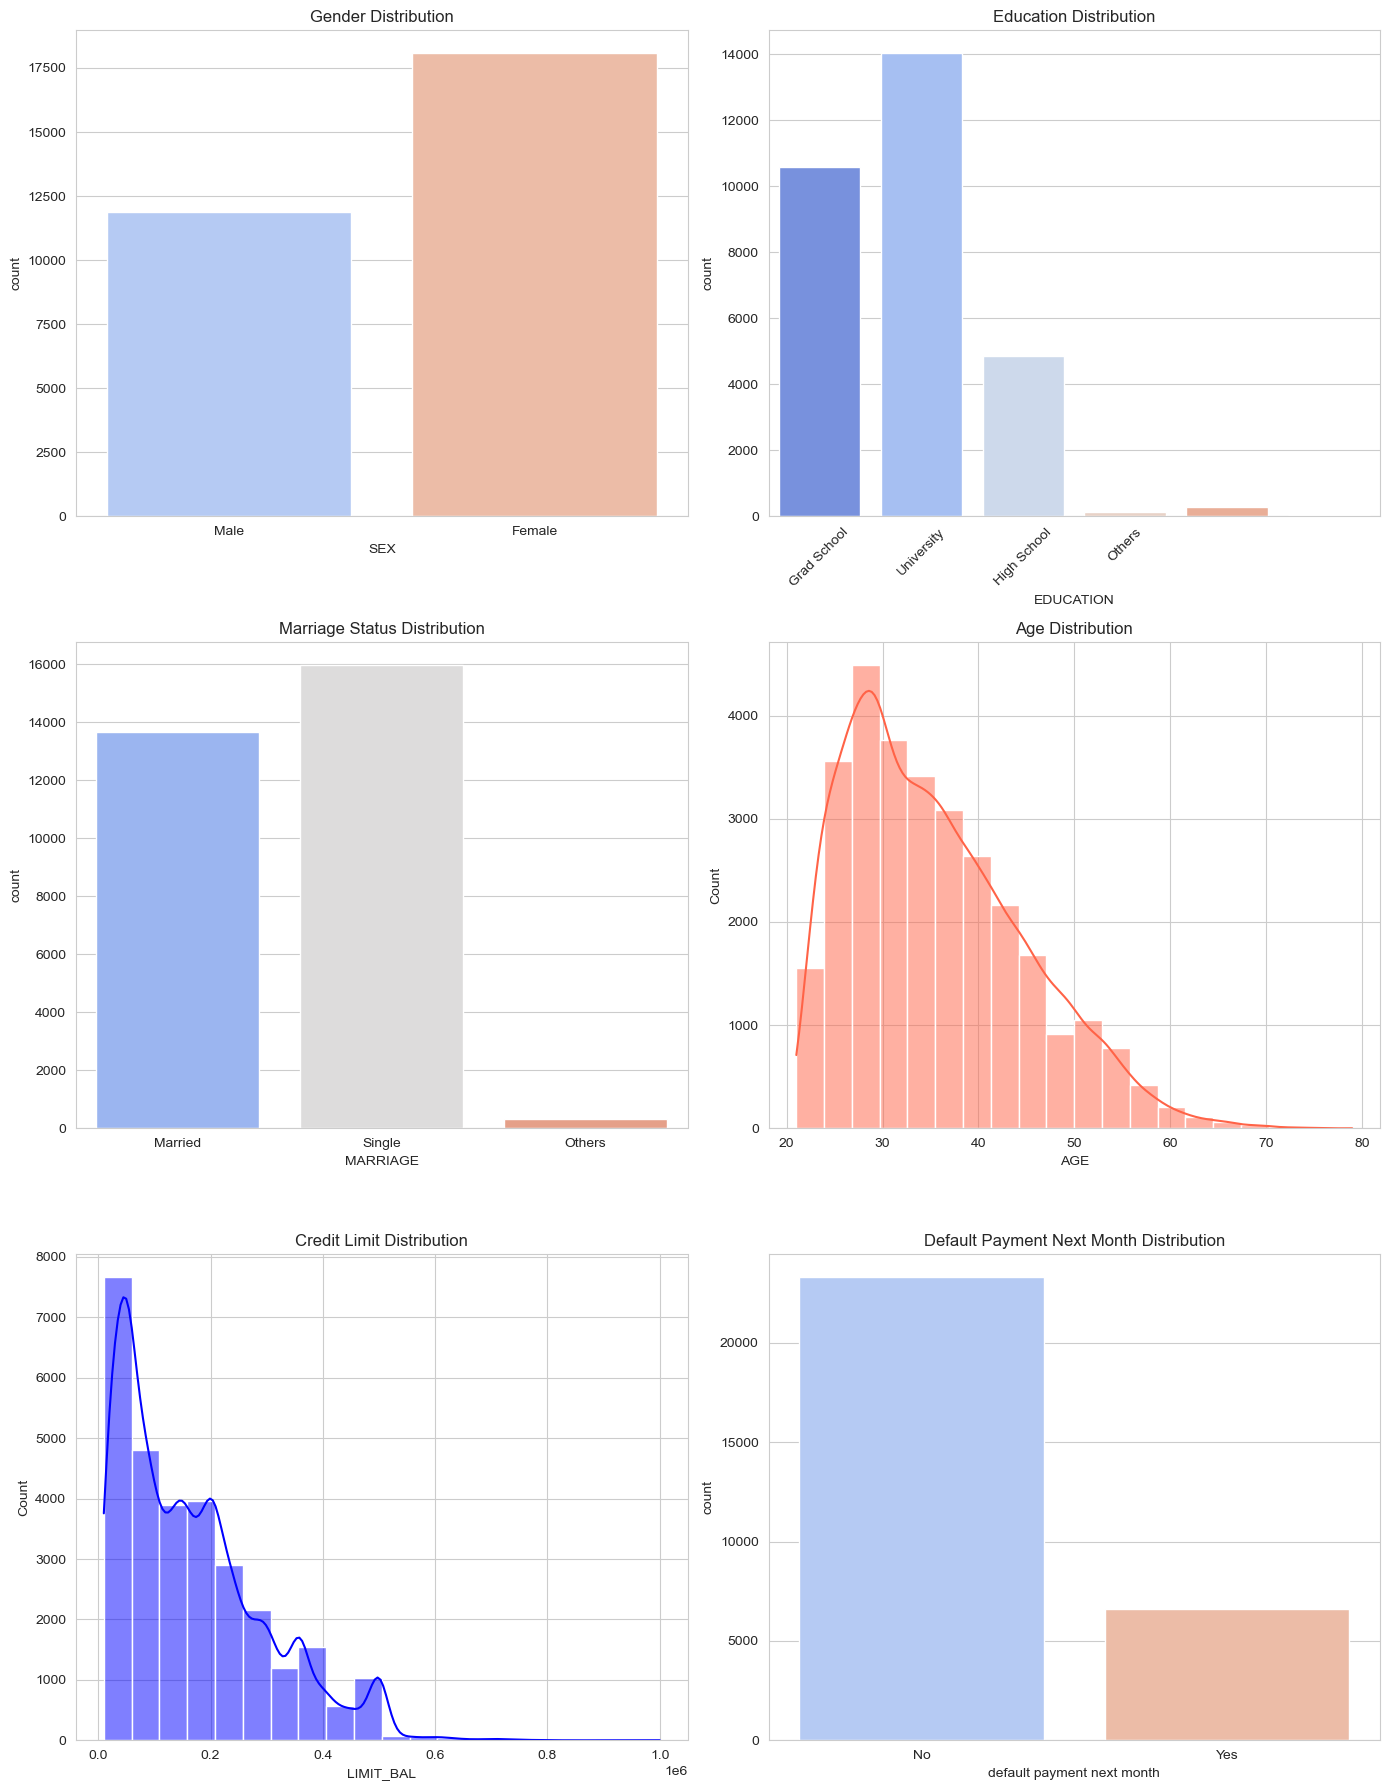

In [5]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


# Remove rows where EDUCATION or MARRIAGE is marked as '0' (Unknown)
credit_card_data = credit_card_data[(credit_card_data['EDUCATION'] != 0) & (credit_card_data['MARRIAGE'] != 0)]

# Redefined function to plot EDA charts excluding unknown categories
def plot_eda_charts_clean(data):
    # Setting up the figure
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
    
    # Gender distribution
    sns.countplot(x='SEX', data=data, ax=axes[0, 0], palette='coolwarm')
    axes[0, 0].set_title('Gender Distribution')
    axes[0, 0].set_xticklabels(['Male', 'Female'])
    
    # Education distribution with known categories only
    sns.countplot(x='EDUCATION', data=data, ax=axes[0, 1], palette='coolwarm')
    axes[0, 1].set_title('Education Distribution')
    axes[0, 1].set_xticklabels(['Grad School', 'University', 'High School', 'Others'], rotation=45)
    
    # Marriage status distribution excluding unknown
    sns.countplot(x='MARRIAGE', data=data, ax=axes[1, 0], palette='coolwarm')
    axes[1, 0].set_title('Marriage Status Distribution')
    axes[1, 0].set_xticklabels(['Married', 'Single', 'Others'])
    
    # Age distribution
    sns.histplot(data['AGE'], bins=20, kde=True, color='tomato', ax=axes[1, 1])
    axes[1, 1].set_title('Age Distribution')
    
    # Credit limit distribution
    sns.histplot(data['LIMIT_BAL'], bins=20, kde=True, color='blue', ax=axes[2, 0])
    axes[2, 0].set_title('Credit Limit Distribution')
    
    # Default payment next month distribution
    sns.countplot(x='default payment next month', data=data, ax=axes[2, 1], palette='coolwarm')
    axes[2, 1].set_title('Default Payment Next Month Distribution')
    axes[2, 1].set_xticklabels(['No', 'Yes'])
    
    # Adjusting the layout
    plt.tight_layout()
    plt.show()

# Call the function to plot charts excluding unknown categories
plot_eda_charts_clean(credit_card_data)


# Code Overview: Transition Matrix for Payment Behavior Analysis

1. **Libraries Used**:
   - `numpy`: For numerical operations (though not explicitly used here).
   - `pandas`: For data manipulation and creating a contingency table.
   - `seaborn` and `matplotlib.pyplot`: For visualizing the transition matrix.

2. **Steps Performed**:
   - **Extract Columns**:
     - Selected the relevant columns `PAY_0` (previous month's payment status) and `PAY_2` (payment status two months prior) from the dataset.
   - **Create Transition Matrix**:
     - Built a **contingency table** using `pd.crosstab()` to calculate the proportion of transitions from `PAY_0` to `PAY_2` for each unique `PAY_0` value.
     - Used `normalize='index'` to normalize rows, converting counts into probabilities for easy comparison.
   - **Visualize the Transition Matrix**:
     - Displayed the transition matrix as a heatmap with `seaborn.heatmap()`:
       - Annotated each cell with the transition probability.
       - Used the `Blues` colormap for clarity and visual appeal.
       - Labeled axes with `PAY_0 Status` and `PAY_2 Status`.

3. **Purpose**:
   - To analyze the **transition probabilities** between different payment statuses (`PAY_0` to `PAY_2`), providing insights into payment behavior patterns.
   - Helps in identifying consistent or inconsistent payment behaviors, which may be valuable for predicting default risk.

4. **Outputs**:
   - A heatmap showing the likelihood of transitions between different payment statuses, where:
     - Rows represent `PAY_0` values (previous month payment status).
     - Columns represent `PAY_2` values (two months prior payment status).
     - Each cell shows the probability of transitioning from a `PAY_0` state to a `PAY_2` state.

5. **Use Cases**:
   - Identify high-risk payment behaviors.
   - Inform strategies for managing or intervening with late-paying customers.


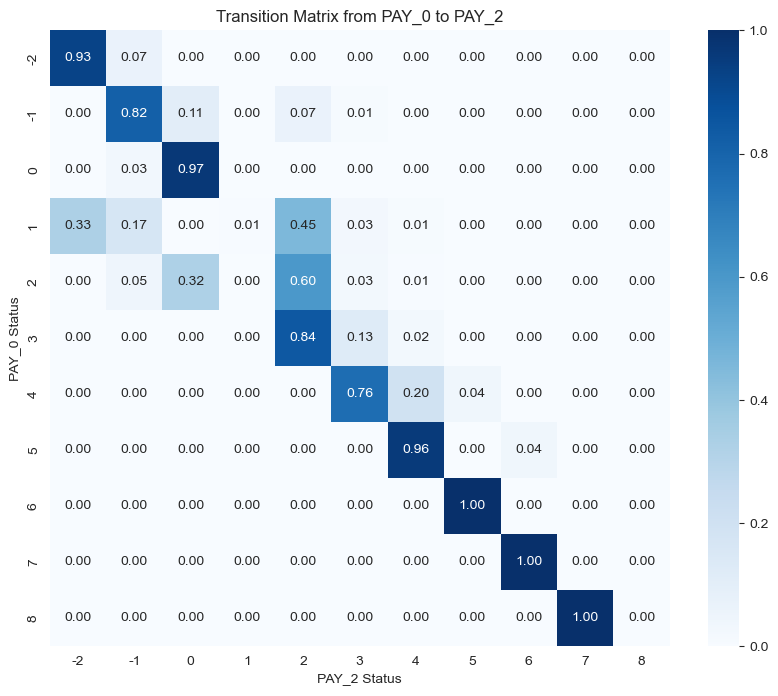

In [7]:
import numpy as np

# Extracting relevant columns
pay_0_2 = credit_card_data[['PAY_0', 'PAY_2']]

# Create a contingency table of transitions from PAY_0 to PAY_2
transition_matrix_pay_0_2 = pd.crosstab(index=pay_0_2['PAY_0'], columns=pay_0_2['PAY_2'], normalize='index')

# Visualizing the transition matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix_pay_0_2, annot=True, fmt=".2f", cmap='Blues')
plt.title('Transition Matrix from PAY_0 to PAY_2')
plt.xlabel('PAY_2 Status')
plt.ylabel('PAY_0 Status')
plt.show()


# Code Overview: Utilization Rate Analysis

1. **Purpose**:
   - To calculate and analyze **utilization rates** (ratio of bill amount to credit limit) for each month and compare them across defaulters and non-defaulters.
   - Helps in identifying patterns in credit usage that might indicate default risk.

2. **Steps Performed**:
   - **Feature Engineering**:
     - Computed monthly utilization rates (`Utilization_1` to `Utilization_6`) by dividing the monthly bill amounts (`BILL_AMT1` to `BILL_AMT6`) by the credit limit (`LIMIT_BAL`) for each customer.
   - **Visualization**:
     - Plotted **box plots** to compare utilization rates for defaulters (`default payment next month` = 1) and non-defaulters (`default payment next month` = 0) across six months.
     - Excluded outliers (`showfliers=False`) for cleaner visualization.

3. **Plot Details**:
   - **Rows and Columns**: Created a grid of 2 rows and 3 columns to display six plots (one for each month).
   - **Axes Labels**:
     - X-axis: Default status (0 = Non-defaulter, 1 = Defaulter).
     - Y-axis: Utilization rate (calculated ratio).
   - **Titles**: Each plot is titled with the corresponding month.

4. **Outputs**:
   - **Box Plots**:
     - Visualizes the spread and median of utilization rates for defaulters and non-defaulters.
     - Highlights differences in utilization patterns, with defaulters potentially showing higher utilization rates.

5. **Insights**:
   - Helps detect whether higher utilization rates are correlated with an increased likelihood of defaulting.
   - Provides valuable information for feature selection or engineering in predictive modeling.




/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/4279993392.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/4279993392.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/4279993392.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/4279993392.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes

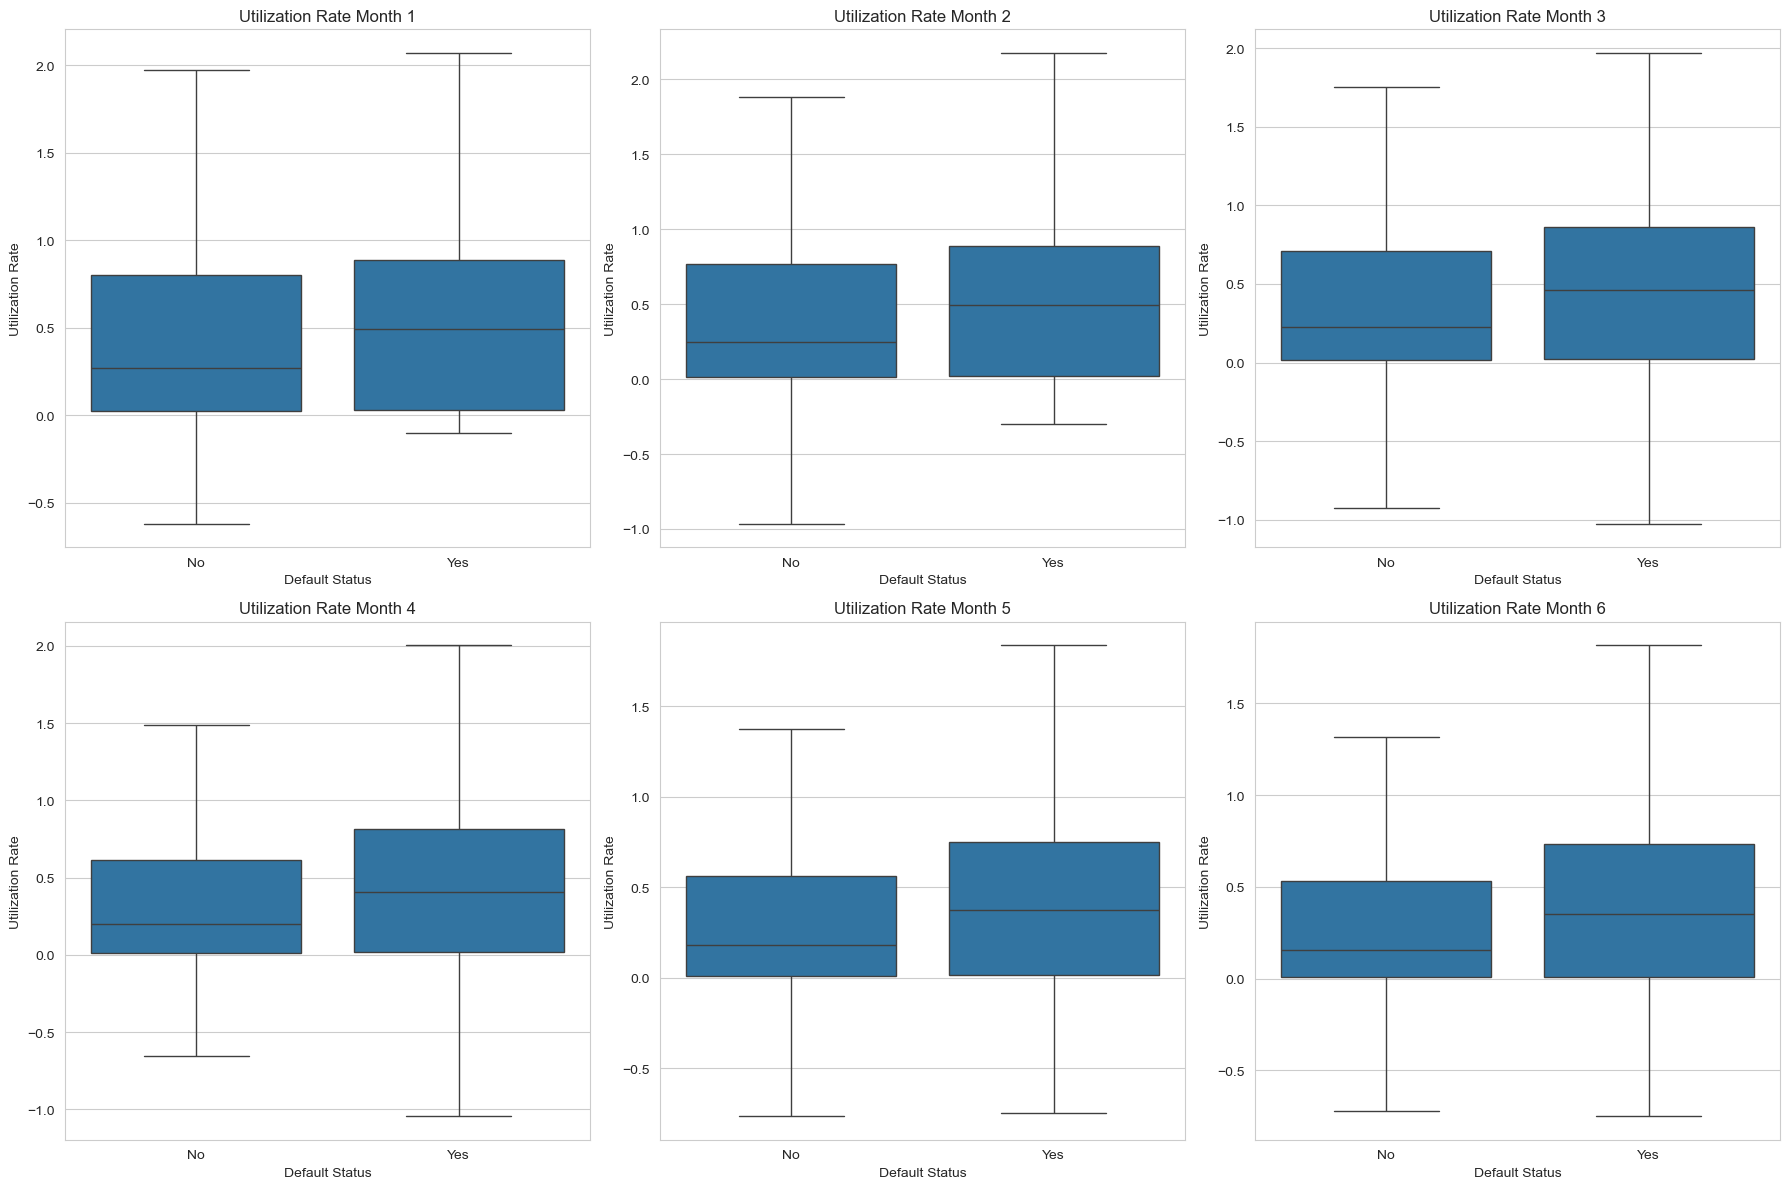

In [11]:
# Calculating Utilization Rates for each month
for month in range(1, 7):
    credit_card_data[f'Utilization_{month}'] = credit_card_data[f'BILL_AMT{month}'] / credit_card_data['LIMIT_BAL']

# Plotting box plots of utilization rates for defaulters vs non-defaulters
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
months = range(1, 7)

for i, month in enumerate(months):
    sns.boxplot(x='default payment next month', y=f'Utilization_{month}', data=credit_card_data,
                showfliers=False, ax=axes[i])  # 'showfliers=False' to avoid showing outliers
    axes[i].set_title(f'Utilization Rate Month {month}')
    axes[i].set_xlabel('Default Status')
    axes[i].set_ylabel('Utilization Rate')
    axes[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


# Code Overview: Education Level and Default Rate Analysis

1. **Purpose**:
   - To analyze the relationship between **education level** and **default status**.
   - Helps in understanding how educational attainment might influence credit behavior and default risk.

2. **Steps Performed**:
   - **Cross-tabulation**:
     - Created a normalized cross-tabulation (`pd.crosstab`) between `EDUCATION` (education level) and `default payment next month` (default status).
     - Normalized by rows (`normalize='index'`) to calculate the proportion of defaulters (`1`) and non-defaulters (`0`) within each education level.
   - **Visualization**:
     - Used a **stacked bar chart** to represent the default and non-default proportions for each education category.
     - Added labels, legends, and titles for clarity.

3. **Plot Details**:
   - **X-axis**: Education levels:
     - `Grad School` (0)
     - `University` (1)
     - `High School` (2)
     - `Others` (3)
   - **Y-axis**: Proportion of default and non-default within each education level.
   - **Color Coding**: 
     - Green: No Default
     - Red: Default
   - **Legend**: Indicates default and non-default proportions.

4. **Outputs**:
   - A stacked bar chart showing:
     - Proportion of defaulters and non-defaulters for each education level.
     - Highlights any education level with a higher or lower tendency to default.

5. **Insights**:
   - Identifies whether certain education levels are more likely to default.
   - Useful for designing targeted credit risk management strategies or enhancing predictive models.



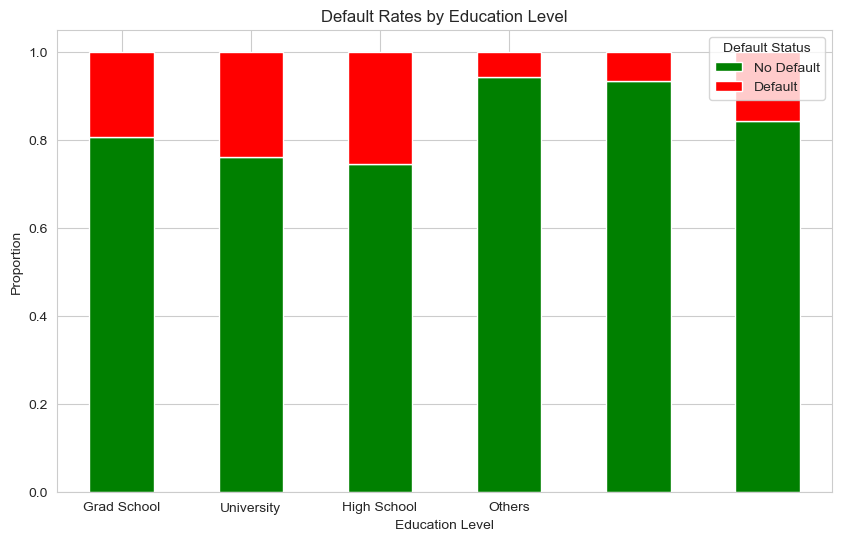

In [14]:
# Cross-tabulation of Education and Default Status
education_default_crosstab = pd.crosstab(index=credit_card_data['EDUCATION'], columns=credit_card_data['default payment next month'], normalize='index')

# Visualizing the cross-tabulation with a bar chart
education_default_crosstab.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Default Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Grad School', 'University', 'High School', 'Others'], rotation=0)
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()


# Code Overview: Correlation Matrix Visualization

1. **Purpose**:
   - To calculate and visualize the correlation matrix for key demographic and financial variables in the dataset.

2. **Steps Performed**:
   - **Column Selection**:
     - Selected relevant columns, including demographic features (`LIMIT_BAL`, `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`), payment statuses (`PAY_0` to `PAY_6`), and the target variable (`default payment next month`).
   - **Correlation Calculation**:
     - Computed the correlation matrix for the selected columns using `DataFrame.corr()`.
     - The correlation matrix quantifies pairwise linear relationships between variables, ranging from -1 (strong negative correlation) to +1 (strong positive correlation).
   - **Visualization**:
     - Created a heatmap using `seaborn.heatmap()`:
       - Annotated with correlation values (`annot=True`).
       - Formatted to two decimal places (`fmt=".2f"`).
       - Used the `coolwarm` colormap for intuitive color gradients.
       - Included a color bar for reference (`cbar=True`).

3. **Plot Details**:
   - **X-axis and Y-axis**: Represent the selected variables.
   - **Heatmap Cells**: Show the strength and direction of correlation between pairs of variables.
   - **Title**: "Correlation Matrix of Demographic and Financial Variables" for clear context.


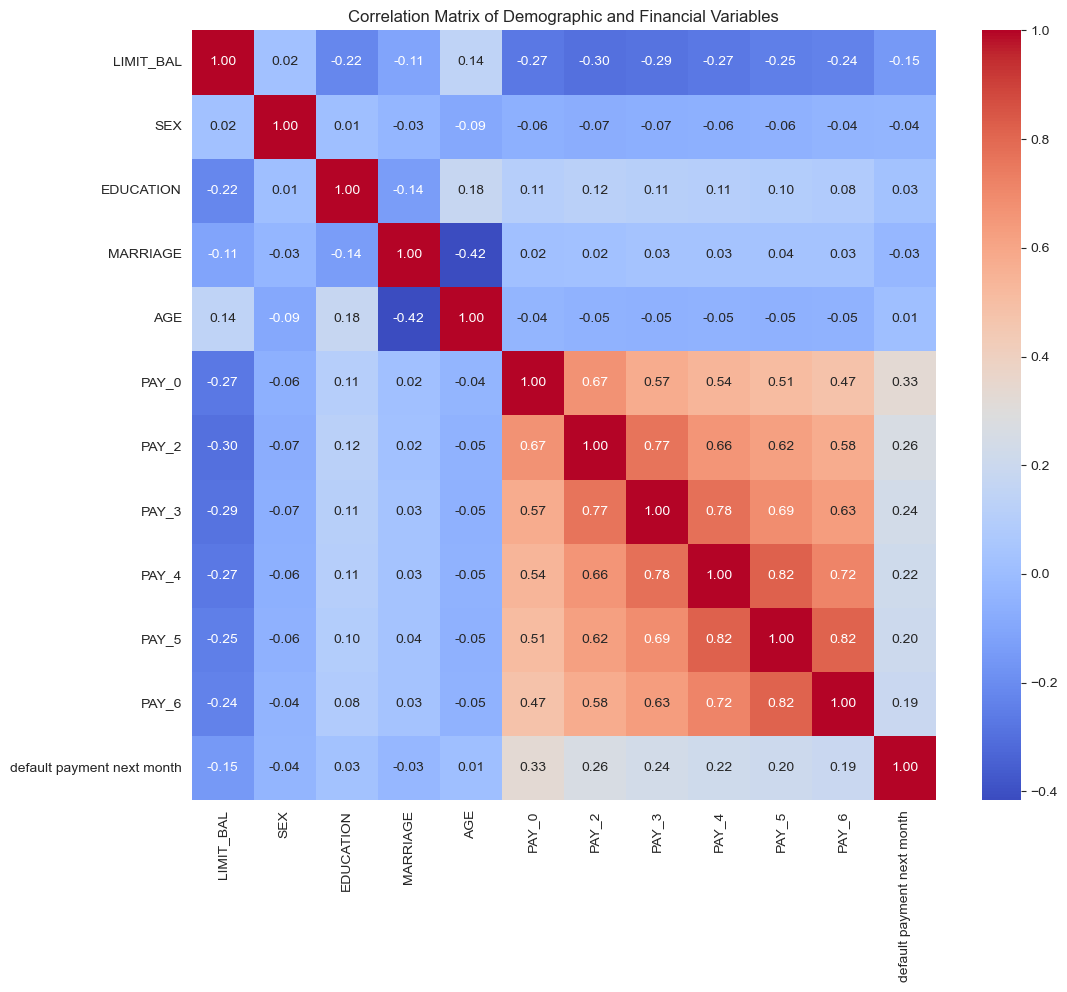

In [17]:
# Adjusting the list of payment status columns to include only those present in the dataset
payment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Updating the list of relevant columns for the correlation matrix
relevant_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'] + payment_columns + ['default payment next month']

# Recalculating the correlation matrix with the correct columns
correlation_matrix = credit_card_data[relevant_columns].corr()

# Visualizing the corrected correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Demographic and Financial Variables')
plt.show()


# Feature Engineering for Payment Analysis

1. **New Features Added**:
   - **Number of Months with a Payment Delay**:
     - Calculated the number of months where the payment status was equal to `1` (1-month delay) and `2` (2-month delay).
     - Iterated through delays (1 and 2) and summed occurrences across the columns `PAY_0` to `PAY_6` for each customer.
     - Created two new features: `Num_Months_Delay_1` and `Num_Months_Delay_2`.
   - **Total Payment Amount**:
     - Calculated the total payment amount over the last six months by summing values across `PAY_AMT1` to `PAY_AMT6` for each customer.
     - Created a new feature: `Total_Pay_Amt`.

2. **Feature Purpose**:
   - **Num_Months_Delay_1** and **Num_Months_Delay_2**: Quantify the payment behavior related to delays, which can help predict default risks.
   - **Total_Pay_Amt**: Captures the overall payment capacity or behavior over a six-month period.

3. **Output**:
   - Displayed the first few rows of the newly created features (`head()`).
   - Columns shown:
     - `Num_Months_Delay_1`: Total months with 1-month delay.
     - `Num_Months_Delay_2`: Total months with 2-month delay.
     - `Total_Pay_Amt`: Total payment amount in the last 6 months.


In [20]:
# Feature Engineering: Aggregating past payment details

# Number of months with a payment delay
for delay in range(1, 3):  # Considering delays of 1 and 2 months
    credit_card_data[f'Num_Months_Delay_{delay}'] = (credit_card_data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] == delay).sum(axis=1)

# Total payment amount in the last 6 months
credit_card_data['Total_Pay_Amt'] = credit_card_data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

# Displaying the new features
credit_card_data[['Num_Months_Delay_1', 'Num_Months_Delay_2', 'Total_Pay_Amt']].head()


,Num_Months_Delay_1,Num_Months_Delay_2,Total_Pay_Amt
0,0,2,689
1,0,2,5000
2,0,0,11018
3,0,0,8388
4,0,0,59049


# Code Overview: Logistic Regression for Default Prediction

1. **Purpose**:
   - To predict the likelihood of a customer defaulting on their payment next month (`default payment next month`) using logistic regression.

2. **Steps Performed**:
   - **Data Preparation**:
     - Selected features for the model: 
       - Aggregated payment delay features (`Num_Months_Delay_1`, `Num_Months_Delay_2`).
       - Total payment amount (`Total_Pay_Amt`).
       - Demographic features (`LIMIT_BAL`, `AGE`, `EDUCATION`, `MARRIAGE`).
     - Target variable: `default payment next month`.
   - **Data Splitting**:
     - Split the data into training (70%) and testing (30%) sets using `train_test_split()`.
   - **Model Initialization and Training**:
     - Initialized a logistic regression model (`LogisticRegression`) with a maximum of 1000 iterations.
     - Trained the model using the training set (`X_train`, `y_train`).
   - **Predictions and Evaluation**:
     - Predicted default status for the test set (`y_test`) using the trained model.
     - Calculated evaluation metrics:
       - **Accuracy**: Overall correctness of the model.
       - **Confusion Matrix**: Breakdown of true positives, true negatives, false positives, and false negatives.
       - **Classification Report**: Includes precision, recall, F1-score, and support for each class.

3. **Outputs**:
   - **Accuracy**: The overall performance of the model.
   - **Confusion Matrix**: Provides insight into the distribution of predicted vs. actual classes.
   - **Classification Report**: Highlights the model's precision, recall, and F1-score for both defaulters (`1`) and non-defaulters (`0`).


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing data for the model
X = credit_card_data[['Num_Months_Delay_1', 'Num_Months_Delay_2', 'Total_Pay_Amt', 'LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']]
y = credit_card_data['default payment next month']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.8031180400890868,
 array([[6716,  296],
        [1472,  496]]),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.96      0.88      7012\n           1       0.63      0.25      0.36      1968\n\n    accuracy                           0.80      8980\n   macro avg       0.72      0.60      0.62      8980\nweighted avg       0.78      0.80      0.77      8980\n')

# Code Overview: Random Forest for Default Prediction

1. **Purpose**:
   - To predict default payment status using a Random Forest classifier.

2. **Steps**:
   - Initialized a **RandomForestClassifier** with 100 trees and trained it on the training data (`X_train`, `y_train`).
   - Predicted default statuses for the test set (`X_test`).
   - Evaluated the model using:
     - **Accuracy**: Overall correctness of predictions.
     - **Confusion Matrix**: Distribution of true/false positives and negatives.
     - **Classification Report**: Precision, recall, F1-score, and support.

3. **Outputs**:
   - `accuracy_rf`: Model accuracy.
   - `conf_matrix_rf`: Confusion matrix.
   - `class_report_rf`: Detailed performance metrics.


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, conf_matrix_rf, class_report_rf


(0.7898663697104678,
 array([[6435,  577],
        [1310,  658]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.92      0.87      7012\n           1       0.53      0.33      0.41      1968\n\n    accuracy                           0.79      8980\n   macro avg       0.68      0.63      0.64      8980\nweighted avg       0.77      0.79      0.77      8980\n')

# Code Overview: Gradient Boosting for Default Prediction

1. **Purpose**:
   - To predict default payment status using a Gradient Boosting classifier.

2. **Steps**:
   - Initialized a **GradientBoostingClassifier** with 100 estimators and a learning rate of 0.1.
   - Trained the model on the training data (`X_train`, `y_train`).
   - Predicted default statuses for the test set (`X_test`).
   - Evaluated the model using:
     - **Accuracy**: Overall prediction accuracy.
     - **Confusion Matrix**: Breakdown of true/false positives and negatives.
     - **Classification Report**: Metrics such as precision, recall, and F1-score.

3. **Outputs**:
   - `accuracy_gbm`: Model accuracy.
   - `conf_matrix_gbm`: Confusion matrix.
   - `class_report_gbm`: Detailed performance metrics.


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
gbm_model.fit(X_train, y_train)

# Making predictions with the Gradient Boosting model
y_pred_gbm = gbm_model.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

accuracy_gbm, conf_matrix_gbm, class_report_gbm


(0.805011135857461,
 array([[6640,  372],
        [1379,  589]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.95      0.88      7012\n           1       0.61      0.30      0.40      1968\n\n    accuracy                           0.81      8980\n   macro avg       0.72      0.62      0.64      8980\nweighted avg       0.78      0.81      0.78      8980\n')

# Code Overview: Support Vector Machine (SVM) for Default Prediction

1. **Purpose**:
   - To predict default payment status using a Support Vector Machine (SVM) with a linear kernel.

2. **Steps**:
   - **Data Splitting**:
     - Split the data into training (70%) and testing (30%) sets using `train_test_split()`.
   - **Feature Scaling**:
     - Applied `StandardScaler` to standardize features for better SVM performance.
   - **Model Training**:
     - Trained an SVM classifier with a linear kernel (`SVC(kernel='linear')`) on the scaled training data.
   - **Predictions**:
     - Predicted default statuses for the scaled test data.
   - **Evaluation**:
     - Calculated evaluation metrics:
       - `accuracy_svm`: Model's overall accuracy.
       - `conf_matrix_svm`: Confusion matrix of predictions.
       - `class_report_svm`: Precision, recall, and F1-score for each class.

3. **Outputs**:
   - Displayed:
     - Model accuracy.
     - Confusion matrix.
     - Classification report.


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Scale the test set with the same scaler

# Training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Making predictions with the scaled test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", class_report_svm)


SVM Accuracy: 0.8030066815144766
SVM Confusion Matrix:
 [[6738  274]
 [1495  473]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      7012
           1       0.63      0.24      0.35      1968

    accuracy                           0.80      8980
   macro avg       0.73      0.60      0.62      8980
weighted avg       0.78      0.80      0.77      8980



# Code Overview: XGBoost Classifier for Default Prediction

1. **Purpose**:
   - To predict default payment status using the XGBoost (Extreme Gradient Boosting) classifier.

2. **Steps**:
   - **Model Initialization**:
     - Initialized an **XGBoostClassifier** with 100 estimators and a learning rate of 0.1.
   - **Model Training**:
     - Trained the XGBoost model on the training data (`X_train`, `y_train`).
   - **Predictions**:
     - Predicted default statuses for the test data (`X_test`).
   - **Evaluation**:
     - Computed the following metrics:
       - **Accuracy (`accuracy_xgb`)**: Overall correctness of predictions.
       - **Confusion Matrix (`conf_matrix_xgb`)**: Breakdown of true/false positives and negatives.
       - **Classification Report (`class_report_xgb`)**: Detailed metrics like precision, recall, and F1-score.

3. **Outputs**:
   - Printed:
     - Model accuracy.
     - Confusion matrix.
     - Classification report.


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions with the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)
print("XGBoost Classification Report:\n", class_report_xgb)


XGBoost Accuracy: 0.8027839643652561
XGBoost Confusion Matrix:
 [[6622  390]
 [1381  587]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7012
           1       0.60      0.30      0.40      1968

    accuracy                           0.80      8980
   macro avg       0.71      0.62      0.64      8980
weighted avg       0.78      0.80      0.78      8980



# Code Overview: Model Performance Comparison Visualization

1. **Purpose**:
   - To visually compare the performance of different models (Logistic Regression, Random Forest, Gradient Boosting, SVM, and XGBoost) based on key metrics: accuracy, precision, recall, and F1-score for the default class.

2. **Data Preparation**:
   - **Models**: Defined a list of model names.
   - **Metrics**:
     - `accuracies`: Overall accuracy of each model.
     - `precisions`: Precision for the default class (`1`) in each model.
     - `recalls`: Recall for the default class (`1`) in each model.
     - `f1_scores`: F1-scores for the default class (`1`) in each model.
   - Calculated the number of models (`n_models`) and set bar positions (`ind`).

3. **Bar Chart Settings**:
   - Defined `width` for the bars to ensure proper spacing between bars of different metrics for each model.

4. **Next Steps**:
   - Use `matplotlib.pyplot` to create a grouped bar chart displaying all metrics for comparison.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost']

# Accuracy of each model
accuracies = [0.7899, 0.8050, 0.8031, 0.8030, 0.8028]

# Precision for default class (class 1)
precisions = [0.53, 0.61, 0.63, 0.63, 0.60]

# Recall for default class (class 1)
recalls = [0.33, 0.30, 0.25, 0.24, 0.30]

# F1-Score for default class (class 1)
f1_scores = [0.41, 0.40, 0.36, 0.35, 0.40]

# Number of models
n_models = len(models)

# Index for each tick position for bar chart
ind = np.arange(n_models)
width = 0.2  # the width of the bars


# Code Overview: Visualization of Model Performance Metrics

1. **Purpose**:
   - To create a grouped bar chart comparing the performance of different models (Logistic Regression, Random Forest, Gradient Boosting, SVM, and XGBoost) across key metrics: accuracy, precision, recall, and F1-score.

2. **Bar Chart Creation**:
   - Plotted bars for:
     - **Accuracy**: Positioned at `ind - width`.
     - **Precision**: Positioned at `ind`.
     - **Recall**: Positioned at `ind + width`.
     - **F1-Score**: Positioned at `ind + 2*width`.
   - Adjusted bar positions to ensure proper grouping for each model.

3. **Labels and Customization**:
   - X-axis labels set to model names.
   - Y-axis limits restricted to `[0, 1]` since metrics range between 0 and 1.
   - Added a legend for clarity (`ax.legend()`).
   - Added labels to bars using the `add_labels` function:
     - Annotates each bar with its respective metric value rounded to two decimal places.

4. **Final Touches**:
   - Added a title: "Performance Metrics by Model".
   - Improved readability with precise annotations and adjusted bar spacing.

5. **Output**:
   - A grouped bar chart showing comparative performance for accuracy, precision, recall, and F1-score across the models.


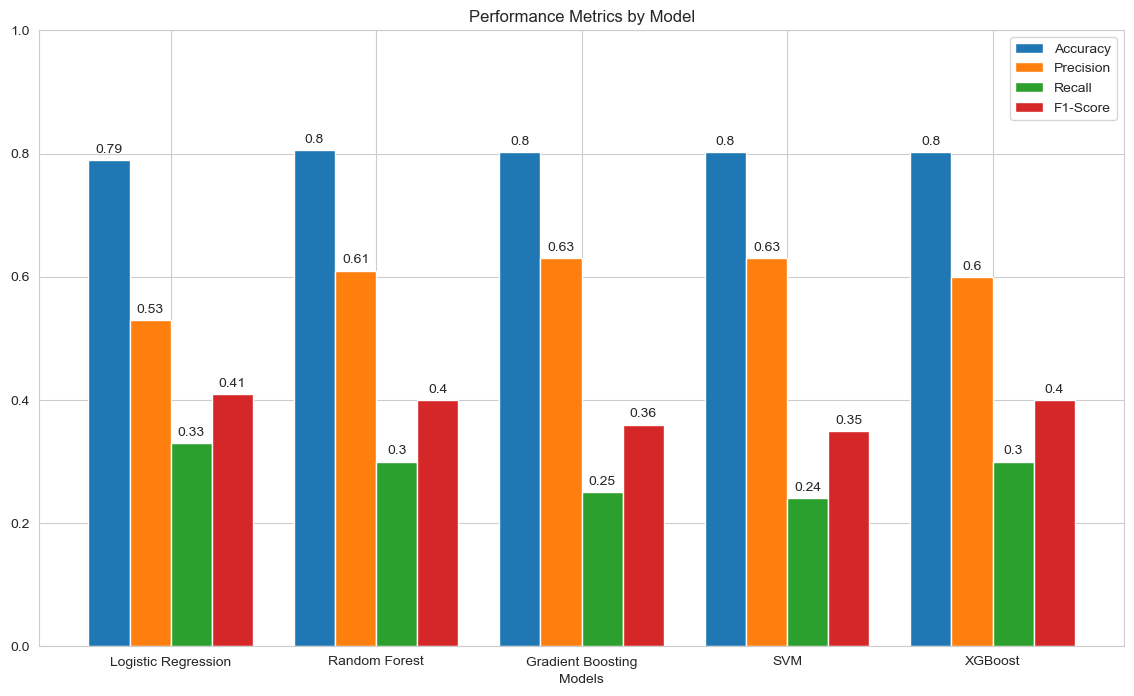

In [38]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each metric
rects1 = ax.bar(ind - width, accuracies, width, label='Accuracy')
rects2 = ax.bar(ind, precisions, width, label='Precision')
rects3 = ax.bar(ind + width, recalls, width, label='Recall')
rects4 = ax.bar(ind + 2*width, f1_scores, width, label='F1-Score')

# Adding labels, title, and custom axes ticks
ax.set_xlabel('Models')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(models)
ax.set_ylim([0, 1])  # Set the limit for Y-axis, since these metrics range from 0 to 1
ax.legend()

# Function to add labels on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to the bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.show()


# Code Overview: K-Means Clustering for Customer Segmentation

1. **Purpose**:
   - To group customers into distinct clusters based on key features such as credit limit, age, payment behavior, and transaction amounts.

2. **Steps Performed**:
   - **Feature Selection**:
     - Selected relevant features (`LIMIT_BAL`, `AGE`, `PAY_0`, `BILL_AMT1`, `PAY_AMT1`) for clustering.
   - **Normalization**:
     - Scaled the features using `StandardScaler` to ensure that all features contribute equally to the clustering process.
   - **Elbow Method**:
     - Calculated the Sum of Squared Errors (SSE) for cluster counts ranging from 1 to 10.
     - Plotted the SSE to identify the optimal number of clusters where the "elbow" in the curve occurs.
   - **K-Means Clustering**:
     - Chose `k=4` (based on the elbow method) and applied K-means clustering to segment the data.
     - Added the resulting cluster labels as a new column (`Cluster`) in the original dataset.
   - **Centroid Analysis**:
     - Computed and displayed the cluster centroids (inverse-transformed for interpretability) to analyze the typical characteristics of each cluster.
   - **Cluster Count**:
     - Counted the number of customers in each cluster.

3. **Outputs**:
   - **Elbow Method Plot**:
     - Helps determine the optimal number of clusters.
   - **Cluster Centroids**:
     - Shows the average values of features for each cluster.
   - **Cluster Counts**:
     - Displays the size of each cluster for better understanding of customer distribution.

4. **Application**:
   - Use the cluster labels to tailor marketing strategies or risk assessments for each customer group.


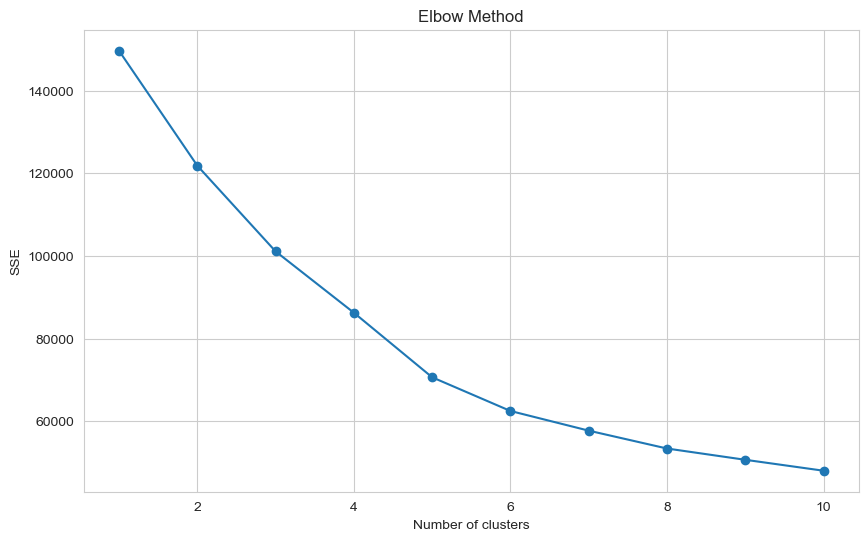

       LIMIT_BAL        AGE     PAY_0      BILL_AMT1      PAY_AMT1
0   91062.726375  28.471930  0.372572   38354.101581   3093.567419
1  288599.645480  36.334895 -1.040770   13785.359711   6178.821727
2   99886.509957  46.641863  0.376404   40372.094924   2986.243749
3  299837.131275  36.672279  0.216713  215461.721858  19668.576551
Cluster
0    12144
1     7897
2     6688
3     3203
Name: count, dtype: int64


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example features - adjust according to your dataset
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1']
X = credit_card_data[features]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow Method to find the optimal number of clusters
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Applying K-means clustering
optimal_k = 4  # Assuming 4 is the optimal number from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original data
credit_card_data['Cluster'] = clusters

# Analyzing cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(centroids)

# Count of each cluster
cluster_counts = credit_card_data['Cluster'].value_counts()
print(cluster_counts)


# Code Overview: Data Loading and Initial Inspection for Optimization

1. **Purpose**:
   - To load the dataset and inspect its structure before applying linear programming for optimization tasks.

2. **Steps Performed**:
   - **Dataset Loading**:
     - Used `pandas.read_csv()` to load the dataset `default of credit card clients.csv` into a DataFrame named `data`.
   - **Initial Inspection**:
     - Displayed the first few rows of the dataset using `data.head()` to understand its structure, columns, and initial values.

3. **Output**:
   - Printed the first few rows of the dataset for visual inspection, helping to identify column names and data types.

4. **Application**:
   - This is the foundational step before setting up a linear programming problem, ensuring familiarity with the dataset structure.


In [47]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load the dataset
data = pd.read_csv('default of credit card clients.csv')

# Display the first few rows to understand what the data looks like
print(data.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

# Code Overview: Enhanced Visualization of Decision Tree

1. **Purpose**:
   - To improve the visual clarity and aesthetics of the decision tree used for classifying credit limit categories (`low`, `medium`, `high`).

2. **Steps Performed**:
   - **Figure Customization**:
     - Increased the figure size (`figsize=(16, 10)`) for better readability.
     - Added a title: "Decision Tree for Credit Limit Allocation" with larger font size (`fontsize=16`).
   - **Decision Tree Plotting**:
     - Used `plot_tree()` to visualize the trained decision tree with the following enhancements:
       - Feature names: Labeled as `Risk Score (PAY_0)` and `Profit Score (BILL_AMT1 / 10,000)`.
       - Class names: Explicitly labeled as `Low`, `Medium`, and `High`.
       - Node styles: Filled and rounded for visual appeal.
       - Increased font size for labels (`fontsize=12`).

3. **Plot Details**:
   - **Nodes**:
     - Represent decision points with thresholds for the risk and profitability scores.
   - **Leaves**:
     - Show the predicted credit limit categories (`Low`, `Medium`, `High`).
   - **Colors**:
     - Nodes are color-coded based on the predicted class.

4. **Output**:
   - A visually enhanced decision tree that clearly communicates how the model predicts credit limit categories based on the risk and profitability scores.


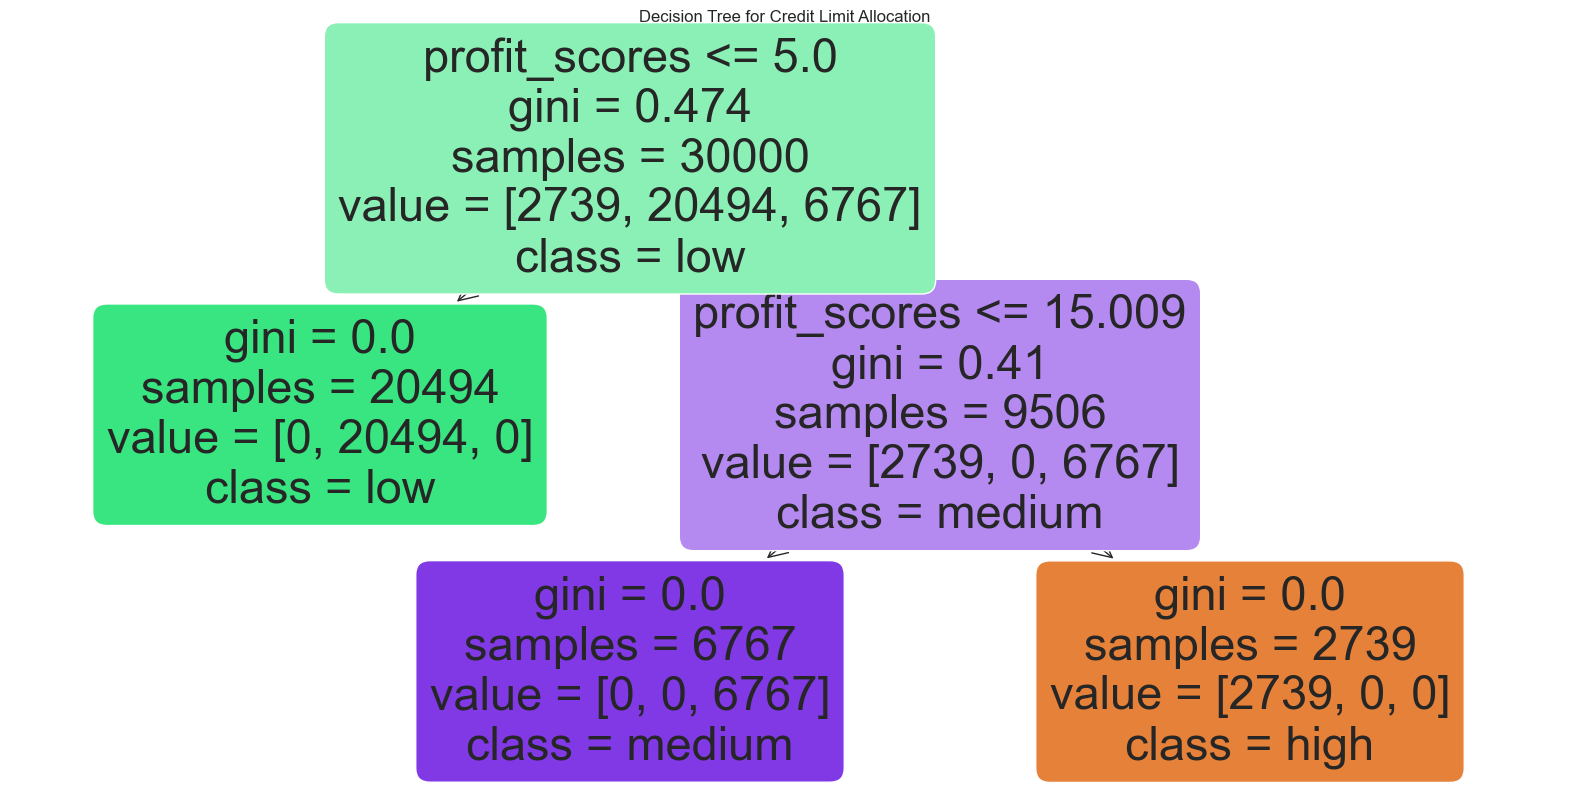

In [50]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('default of credit card clients.csv')

# For simplicity, let's assume you've already calculated 'risk_scores' and 'profit_scores'
data['risk_scores'] = data['PAY_0']
data['profit_scores'] = data['BILL_AMT1'] / 10000

# Create a simple target variable for credit limit categories based on some thresholds
conditions = [
    (data['BILL_AMT1'] <= 50000),
    (data['BILL_AMT1'] > 50000) & (data['BILL_AMT1'] <= 150000),
    (data['BILL_AMT1'] > 150000)
]
choices = ['low', 'medium', 'high']
data['credit_limit_category'] = np.select(conditions, choices, default='low')

# Features and target
X = data[['risk_scores', 'profit_scores']]
y = data['credit_limit_category']

# Train a decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=['risk_scores', 'profit_scores'], class_names=sorted(y.unique()), filled=True, rounded=True)
plt.title('Decision Tree for Credit Limit Allocation')
plt.show()


# Code Overview: Enhanced Visualization of Decision Tree

1. **Purpose**:
   - To improve the visual clarity and aesthetics of the decision tree used for classifying credit limit categories (`low`, `medium`, `high`).

2. **Steps Performed**:
   - **Figure Customization**:
     - Increased the figure size (`figsize=(16, 10)`) for better readability.
     - Added a title: "Decision Tree for Credit Limit Allocation" with larger font size (`fontsize=16`).
   - **Decision Tree Plotting**:
     - Used `plot_tree()` to visualize the trained decision tree with the following enhancements:
       - Feature names: Labeled as `Risk Score (PAY_0)` and `Profit Score (BILL_AMT1 / 10,000)`.
       - Class names: Explicitly labeled as `Low`, `Medium`, and `High`.
       - Node styles: Filled and rounded for visual appeal.
       - Increased font size for labels (`fontsize=12`).

3. **Plot Details**:
   - **Nodes**:
     - Represent decision points with thresholds for the risk and profitability scores.
   - **Leaves**:
     - Show the predicted credit limit categories (`Low`, `Medium`, `High`).
   - **Colors**:
     - Nodes are color-coded based on the predicted class.

4. **Output**:
   - A visually enhanced decision tree that clearly communicates how the model predicts credit limit categories based on the risk and profitability scores.


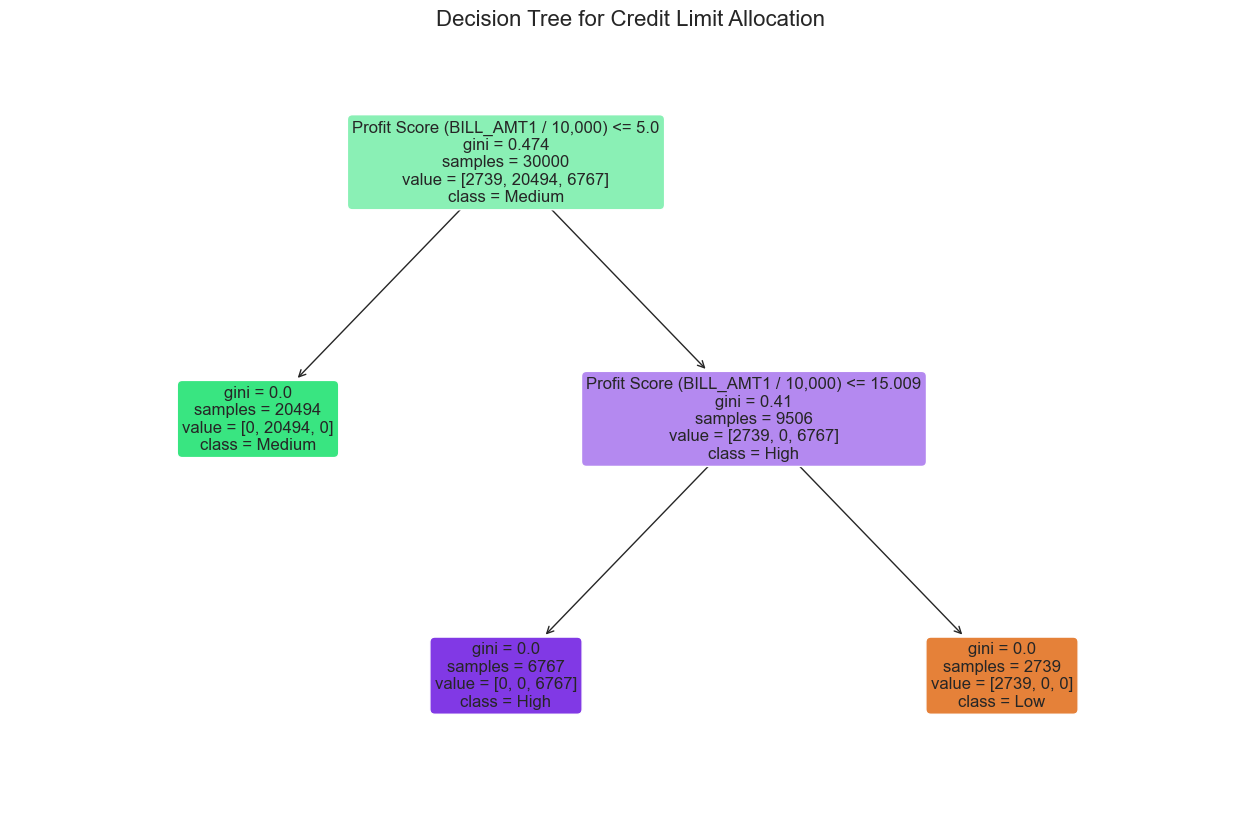

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Enhanced plot_tree visualization
plt.figure(figsize=(16, 10))  # Increase figure size
plot_tree(
    tree_model, 
    feature_names=['Risk Score (PAY_0)', 'Profit Score (BILL_AMT1 / 10,000)'], 
    class_names=['Low', 'Medium', 'High'], 
    filled=True, 
    rounded=True, 
    fontsize=12  # Increase font size
)
plt.title('Decision Tree for Credit Limit Allocation', fontsize=16)
plt.show()


# Code Overview: Accuracy Evaluation and Visualization for Decision Tree

1. **Purpose**:
   - To evaluate the accuracy of the decision tree model on both training and testing datasets and visualize the results.

2. **Steps Performed**:
   - **Data Splitting**:
     - Split the dataset into training (70%) and testing (30%) sets using `train_test_split()` with a fixed random state for reproducibility.
   - **Model Training**:
     - Trained the decision tree (`tree_model`) on the training set (`X_train`, `y_train`).
   - **Accuracy Calculation**:
     - Computed accuracy scores for:
       - Training set (`train_accuracy`): Measures how well the model fits the training data.
       - Testing set (`test_accuracy`): Evaluates the model's generalization ability.
   - **Visualization**:
     - Created a bar chart using `matplotlib` to compare training and testing accuracies:
       - Bar colors: Blue for training accuracy and orange for testing accuracy.
       - Y-axis range: Restricted to `[0, 1]`, as accuracy values are proportions.
       - Added a title and labeled axes for clarity.

3. **Plot Details**:
   - **X-axis**: Displays labels for training and test accuracies.
   - **Y-axis**: Represents accuracy values.
   - **Bar Heights**: Correspond to the accuracy scores for the respective datasets.

4. **Output**:
   - A bar chart showing training and testing accuracy, providing insights into model performance and potential overfitting or underfitting.


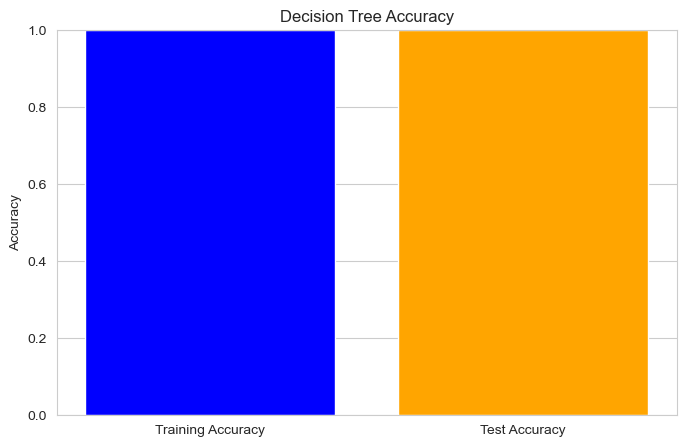

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree on the training data
tree_model.fit(X_train, y_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, tree_model.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_model.predict(X_test))

# Visualize accuracies
import matplotlib.pyplot as plt

accuracy_values = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy values range between 0 and 1
plt.title('Decision Tree Accuracy')
plt.ylabel('Accuracy')
plt.show()


# Code Overview: Feature Importance Visualization Using Heatmap

1. **Purpose**:
   - To analyze and visualize the importance of features (`Risk_Score` and `Profit_Score`) in the decision tree model for predicting credit categories (`Low`, `Medium`, `High`).

2. **Steps Performed**:
   - **Data Simulation**:
     - Created a simplified synthetic dataset with three columns:
       - `Risk_Score`: Random integers (1 to 10).
       - `Profit_Score`: Random integers (1 to 20).
       - `Credit_Category`: Randomly assigned categories (`Low`, `Medium`, `High`).
   - **Model Training**:
     - Trained a decision tree classifier (`DecisionTreeClassifier`) with a maximum depth of 3.
   - **Feature Importance Extraction**:
     - Extracted feature importance scores using the model's `feature_importances_` attribute.
     - Stored the feature names and their corresponding importance values in a DataFrame (`importance_df`).
   - **Visualization**:
     - Created a heatmap using `seaborn.heatmap()`:
       - Displayed importance values with annotations (`annot=True`).
       - Used the `Blues` colormap for visual appeal.
       - Excluded the color bar (`cbar=False`) for a cleaner look.
       - Rotated x-axis labels for readability.

3. **Plot Details**:
   - **X-axis**: Features (`Risk Score` and `Profit Score`).
   - **Y-axis**: Represents "Importance" with a single row displaying the feature importance scores.
   - **Colors**: The intensity of the blue color indicates the relative importance of each feature.

4. **Output**:
   - A heatmap highlighting the importance of each feature in the decision tree's decision-making process.
   - Visual representation helps prioritize features for further analysis or refinement.


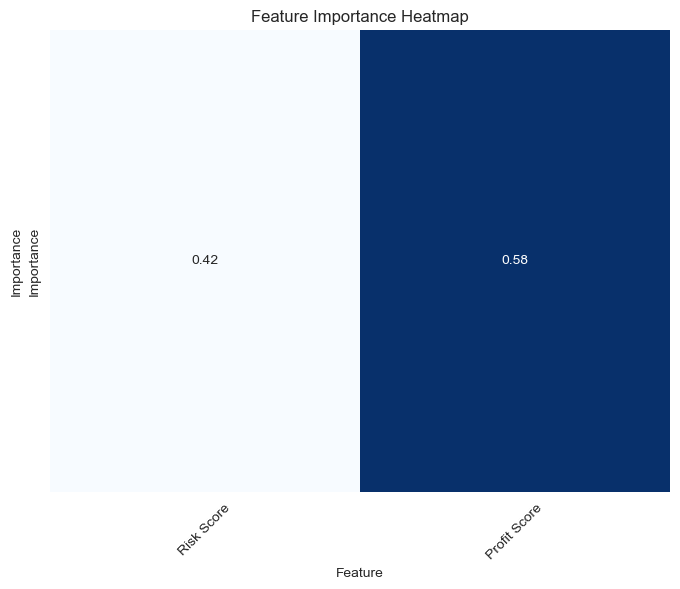

In [59]:
# Re-importing necessary libraries and reloading the decision tree environment
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating a simplified dataset as a placeholder for the original dataset
np.random.seed(42)
data = pd.DataFrame({
    'Risk_Score': np.random.randint(1, 10, 100),
    'Profit_Score': np.random.randint(1, 20, 100),
    'Credit_Category': np.random.choice(['Low', 'Medium', 'High'], 100)
})

# Features and target
X = data[['Risk_Score', 'Profit_Score']]
y = data['Credit_Category']

# Train the decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Extract feature importance
feature_importances = tree_model.feature_importances_
feature_names = ['Risk Score', 'Profit Score']

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Create a heatmap to visualize feature importance
plt.figure(figsize=(8, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='Blues', cbar=False, fmt=".2f")
plt.title('Feature Importance Heatmap')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


# Code Overview: Feature Engineering for Payment Behavior Analysis

1. **Purpose**:
   - To create features related to payment behavior by analyzing the relationship between payments and bill amounts over six months.

2. **Steps Performed**:
   - **Payment-to-Bill Ratio**:
     - For each month (`PAY_AMT1` to `PAY_AMT6` and `BILL_AMT1` to `BILL_AMT6`), calculated the ratio of payments made to the billed amount.
     - New columns: `Pay_Bill_Ratio_1`, `Pay_Bill_Ratio_2`, ..., `Pay_Bill_Ratio_6`.
   - **Average Payment-to-Bill Ratio**:
     - Computed the average ratio across the six months.
     - New column: `Avg_Pay_Bill_Ratio`.
   - **Volatility (Standard Deviation)**:
     - Calculated the standard deviation of payment-to-bill ratios to measure variability in payment behavior.
     - New column: `Pay_Bill_Ratio_StdDev`.
   - **Coefficient of Variation (CV)**:
     - Computed CV as the ratio of standard deviation to the mean payment-to-bill ratio.
     - Captures normalized variability in payment behavior.
     - New column: `Pay_Bill_Ratio_CV`.

3. **Output**:
   - Displayed a preview (`head()`) of the new columns:
     - `Avg_Pay_Bill_Ratio`: Average payment consistency.
     - `Pay_Bill_Ratio_StdDev`: Variability in payment behavior.
     - `Pay_Bill_Ratio_CV`: Normalized variability, useful for comparative analysis.

4. **Application**:
   - These features can be used for further analysis, such as:
     - Identifying high-risk customers based on erratic payment behavior.
     - Incorporating into predictive models for default risk.


In [62]:
import pandas as pd

# Load the dataset
file_path = 'default of credit card clients.csv'
credit_card_data = pd.read_csv(file_path)

# Calculating the ratio of payment to bill amount for each month
for month in range(1, 7):  # For months 1 through 6
    credit_card_data[f'Pay_Bill_Ratio_{month}'] = credit_card_data[f'PAY_AMT{month}'] / credit_card_data[f'BILL_AMT{month}']

# Calculating the average payment-to-bill ratio across the 6 months
credit_card_data['Avg_Pay_Bill_Ratio'] = credit_card_data[[f'Pay_Bill_Ratio_{month}' for month in range(1, 7)]].mean(axis=1)

# Calculating the standard deviation (volatility) of payment-to-bill ratios across the 6 months
credit_card_data['Pay_Bill_Ratio_StdDev'] = credit_card_data[[f'Pay_Bill_Ratio_{month}' for month in range(1, 7)]].std(axis=1)

# Calculating the coefficient of variation (CV) of payment-to-bill ratios
credit_card_data['Pay_Bill_Ratio_CV'] = (
    credit_card_data['Pay_Bill_Ratio_StdDev'] / credit_card_data['Avg_Pay_Bill_Ratio']
)

# Displaying the new columns
credit_card_data[['Avg_Pay_Bill_Ratio', 'Pay_Bill_Ratio_StdDev', 'Pay_Bill_Ratio_CV']].head()


,Avg_Pay_Bill_Ratio,Pay_Bill_Ratio_StdDev,Pay_Bill_Ratio_CV
0,0.074038,0.128238,1.732051
1,0.311916,0.268659,0.861317
2,0.115141,0.102736,0.892260
3,0.036396,0.006722,0.184678
4,1.246958,2.562874,2.055301


# Code Overview: Correlation Analysis of New Features with Default Status

1. **Purpose**:
   - To analyze the relationship between the newly engineered features and the default payment status (`default payment next month`).

2. **Steps Performed**:
   - **Correlation Matrix**:
     - Created a correlation matrix using the `corr()` function for the selected features:
       - `Avg_Pay_Bill_Ratio`: Average payment-to-bill ratio.
       - `Pay_Bill_Ratio_StdDev`: Standard deviation of payment-to-bill ratios.
       - `Pay_Bill_Ratio_CV`: Coefficient of variation for payment-to-bill ratios.
       - `default payment next month`: Target variable.
   - **Extract Correlations**:
     - Extracted the correlations of the new features with the target variable `default payment next month`.
     - Excluded the self-correlation of the target variable.

3. **Output**:
   - Displayed the correlation values between:
     - `Avg_Pay_Bill_Ratio` and default status.
     - `Pay_Bill_Ratio_StdDev` and default status.
     - `Pay_Bill_Ratio_CV` and default status.

4. **Application**:
   - Use these correlations to:
     - Identify which features have the strongest relationship with default behavior.
     - Determine the most impactful predictors for modeling and risk assessment.


In [65]:
# Calculating correlations of the new features with default payment status
new_features = ['Avg_Pay_Bill_Ratio', 'Pay_Bill_Ratio_StdDev', 'Pay_Bill_Ratio_CV']
correlations = credit_card_data[new_features + ['default payment next month']].corr()

# Extract correlations with the target variable 'default payment next month'
correlation_with_target = correlations['default payment next month'].drop('default payment next month')

# Displaying the correlations
correlation_with_target


Avg_Pay_Bill_Ratio       0.003235
Pay_Bill_Ratio_StdDev   -0.006335
Pay_Bill_Ratio_CV        0.008956
Name: default payment next month, dtype: float64

# Code Overview: Visualization of Correlations with Heatmap

1. **Purpose**:
   - To visually represent the correlation matrix between the newly engineered features and the default payment status (`default payment next month`).

2. **Steps Performed**:
   - **Heatmap Creation**:
     - Used `seaborn.heatmap()` to visualize the correlation matrix for the selected features:
       - `Avg_Pay_Bill_Ratio`: Average payment-to-bill ratio.
       - `Pay_Bill_Ratio_StdDev`: Variability in payment-to-bill ratios.
       - `Pay_Bill_Ratio_CV`: Normalized variability (coefficient of variation).
       - `default payment next month`: Target variable.
   - **Annotations**:
     - Displayed the correlation values in the heatmap with two decimal precision (`fmt=".2f"`).
   - **Color Scheme**:
     - Used the `coolwarm` colormap for intuitive color gradients:
       - Positive correlations appear in shades of red.
       - Negative correlations appear in shades of blue.
   - **Plot Title and Customizations**:
     - Added a descriptive title: "Correlation Heatmap: New Features and Default Payment Status".
     - Enabled a color bar (`cbar=True`) for reference.

3. **Output**:
   - A heatmap showing the strength and direction of correlations between:
     - The new features (`Avg_Pay_Bill_Ratio`, `Pay_Bill_Ratio_StdDev`, `Pay_Bill_Ratio_CV`).
     - The target variable (`default payment next month`).

4. **Application**:
   - Visualize the importance of each feature in predicting default payment behavior.
   - Identify strong and weak correlations for feature selection in predictive modeling.


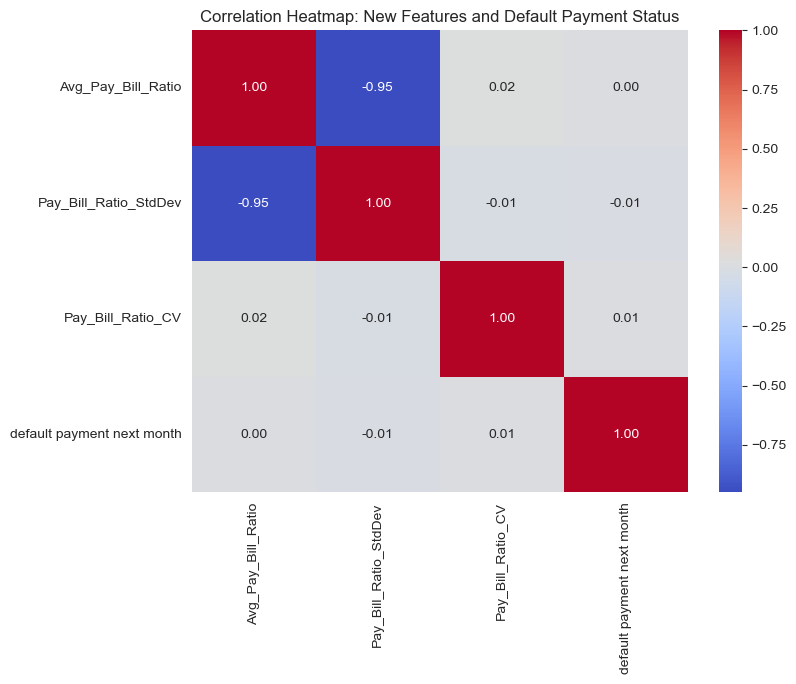

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the correlations are calculated correctly, plot a heatmap for the new features and target correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlations.loc[new_features + ['default payment next month'], new_features + ['default payment next month']],
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: New Features and Default Payment Status')
plt.show()


# Code Overview: Boxplot of Payment Volatility by Default Status

1. **Purpose**:
   - To visualize the relationship between payment volatility (coefficient of variation, `Pay_Bill_Ratio_CV`) and the likelihood of defaulting (`default payment next month`).

2. **Steps Performed**:
   - **Boxplot Creation**:
     - Used `seaborn.boxplot()` to plot `Pay_Bill_Ratio_CV` values for two groups:
       - `0`: Customers who did not default.
       - `1`: Customers who defaulted.
   - **Customization**:
     - **X-axis**: Labeled as "Default Payment Next Month (0 = No, 1 = Yes)".
     - **Y-axis**: Labeled as "Payment Volatility (Coefficient of Variation)".
     - **Color Palette**: Used `coolwarm` for visually distinct groups.
     - Included outliers in the plot (`showfliers=True`) to capture full variability.

3. **Plot Details**:
   - **Boxes**:
     - Represent the interquartile range (IQR) of payment volatility.
   - **Whiskers**:
     - Show variability outside the upper and lower quartiles.
   - **Outliers**:
     - Represent extreme values in payment volatility.

4. **Output**:
   - A boxplot comparing the distribution of payment volatility for defaulters and non-defaulters.
   - Highlights differences in variability, which could indicate erratic payment behavior in defaulters.

5. **Application**:
   - Identify if high payment volatility correlates with increased default risk.
   - Use insights to refine predictive models or risk assessment strategies.


/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2971/379819203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


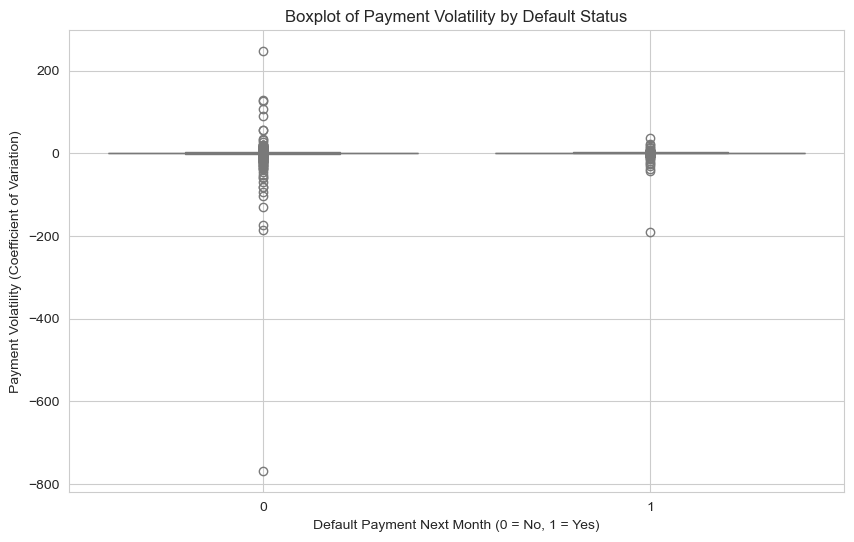

In [71]:
# Boxplot to show the correlation of payment volatility with default status
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='default payment next month', 
    y='Pay_Bill_Ratio_CV', 
    data=credit_card_data, 
    palette='coolwarm', 
    showfliers=True  # Include outliers for full insight
)
plt.title('Boxplot of Payment Volatility by Default Status')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Payment Volatility (Coefficient of Variation)')
plt.grid(True)
plt.show()


# Code Overview: Trends in Payment-to-Bill Ratios Over Six Months

1. **Purpose**:
   - To visualize trends in payment-to-bill ratios (`Pay_Bill_Ratio`) over six months for a random sample of customers, identifying patterns or inconsistencies in payment behavior.

2. **Steps Performed**:
   - **Random Sampling**:
     - Selected a random sample of 50 customers from the dataset for clear and manageable visualization.
   - **Line Plot**:
     - For each sampled customer, plotted the `Pay_Bill_Ratio` across six months (`Month 1` to `Month 6`).
     - Set transparency (`alpha=0.6`) to make overlapping lines easier to discern.

3. **Plot Details**:
   - **X-axis**:
     - Represents months (`Month 1` to `Month 6`).
   - **Y-axis**:
     - Represents the payment-to-bill ratio, showing the proportion of bills paid each month.
   - **Grid**:
     - Added a grid for better readability of trends.

4. **Output**:
   - A line plot illustrating the trends in payment-to-bill ratios for 50 customers over six months.
   - Each line corresponds to an individual customer.

5. **Insights**:
   - Identify customers with consistent payment behavior (stable lines).
   - Spot erratic patterns, such as fluctuating or declining ratios, which might indicate riskier behavior.

6. **Application**:
   - Use observed trends to cluster customers or refine predictive models for default risk.


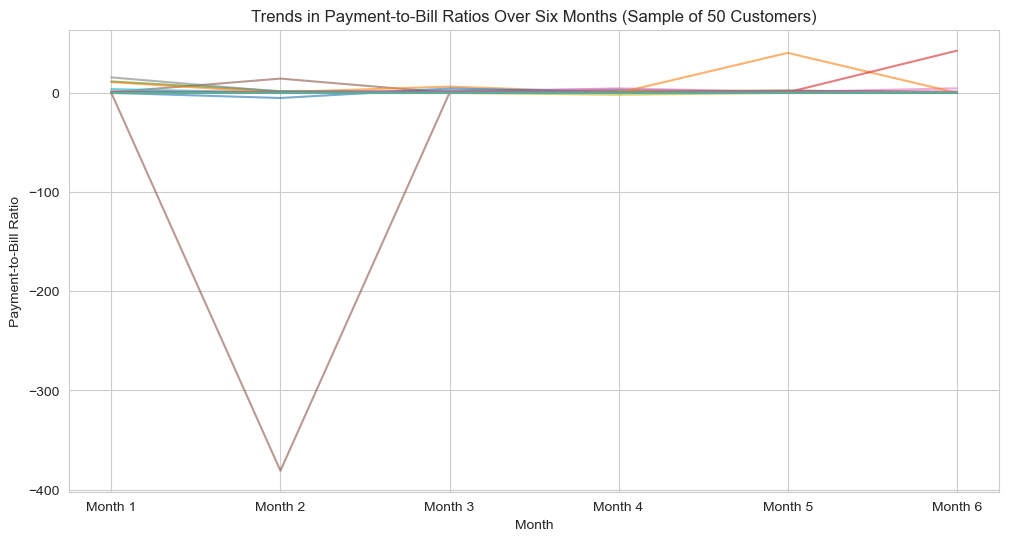

In [74]:
# Line plot to visualize trends in payment-to-bill ratios across the months
plt.figure(figsize=(12, 6))

# Selecting a random sample of 50 customers to visualize trends clearly
sampled_data = credit_card_data.sample(50, random_state=42)

# Plotting payment-to-bill ratios for each month
for _, row in sampled_data.iterrows():
    plt.plot(range(1, 7), row[[f'Pay_Bill_Ratio_{month}' for month in range(1, 7)]], alpha=0.6)

# Adding plot details
plt.title('Trends in Payment-to-Bill Ratios Over Six Months (Sample of 50 Customers)')
plt.xlabel('Month')
plt.ylabel('Payment-to-Bill Ratio')
plt.xticks(ticks=range(1, 7), labels=[f'Month {i}' for i in range(1, 7)])
plt.grid(True)
plt.show()


In [107]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load the dataset
data = pd.read_csv('default of credit card clients.csv')

# Display the first few rows to understand what the data looks like
print(data.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

# Linear Programming for Credit Limit Allocation

1. **Purpose**:
   - Allocate optimal credit limits to customers in order to maximize total profitability while keeping risk exposure within a defined threshold.

2. **Key Components**:
   - **Risk Scores**:
     - `risk_scores`: Derived from the `PAY_0` column, representing a proxy for the customer's risk.
   - **Profit Scores**:
     - `profit_scores`: Derived by scaling the `BILL_AMT1` column, representing potential profitability.

3. **Linear Programming Problem**:
   - **Decision Variables**:
     - `credit_limits`: Continuous variables representing the credit limits for each customer, constrained between $1,000 and $10,000.
   - **Objective Function**:
     - Maximize the total profitability, calculated as the sum of credit limits multiplied by profit scores.
   - **Constraints**:
     - Total risk must remain below the specified threshold (`total_risk_allowed = 100,000`).

4. **Implementation**:
   - **Define Problem**:
     - Created a linear programming problem (`LpProblem`) with the objective of maximization (`LpMaximize`).
   - **Solve Problem**:
     - Used the PuLP solver to find the optimal credit limit allocation.
   - **Output Results**:
     - Displayed the allocated credit limits for the first five customers.

5. **Sample Output**:
   ```plaintext
   Client 0: Allocated Credit Limit = $XXXX.XX
   Client 1: Allocated Credit Limit = $XXXX.XX
   ...


In [109]:
# Example risk and profit scores (these should ideally be derived from your data analysis)
risk_scores = data['PAY_0']  # Hypothetically using PAY_0 as a proxy for risk
profit_scores = data['BILL_AMT1'] / 10000  # Simplified profit score based on bill amount

# Define the LP problem
prob = LpProblem("Credit_Limit_Allocation", LpMaximize)

# Decision variables: Credit limits, which we initially restrict to between $1,000 and $10,000 for simplicity
credit_limits = {i: LpVariable(f"credit_limit_{i}", lowBound=1000, upBound=10000, cat='Continuous') for i in data.index}

# Objective function: Maximize total profitability
prob += lpSum([credit_limits[i] * profit_scores[i] for i in data.index])

# Constraint: Keep total risk under a certain threshold
total_risk_allowed = 100000  # Hypothetical total risk value
prob += lpSum([credit_limits[i] * risk_scores[i] for i in data.index]) <= total_risk_allowed

# Solve the problem
prob.solve()

# Output results for a few clients
for i in range(5):
    print(f"Client {i}: Allocated Credit Limit = ${credit_limits[i].varValue}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/25f925baaf7045fa8c1fddda88c98c30-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/25f925baaf7045fa8c1fddda88c98c30-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 43262 RHS
At line 43264 BOUNDS
At line 103265 ENDATA
Problem MODEL has 1 rows, 30000 columns and 15263 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
0  Obj 1.5366999e+08 Dual inf 1.04008e+14 (27402)
Optimal - objective value 1.5373131e+09
Optimal objective 1537313124 - 0 iterations time 0.012
Option for printingOptions changed 

# Visualization: Profitability Scores vs. Allocated Credit Limits

1. **Purpose**:
   - To analyze the relationship between profitability scores (`BILL_AMT1 / 10,000`) and the allocated credit limits from the optimization process.

2. **Steps Performed**:
   - **Scatter Plot**:
     - Plotted `profit_scores` on the X-axis, representing the profitability potential of each customer.
     - Plotted `allocated_limits` on the Y-axis, representing the optimized credit limit for each customer.
   - **Customization**:
     - Set the plot title: "Profitability Scores vs. Allocated Credit Limits".
     - Added axis labels for clarity:
       - **X-axis**: "Profitability Score".
       - **Y-axis**: "Allocated Credit Limit ($)".
     - Enabled grid lines to improve readability.

3. **Output**:
   - A scatter plot where:
     - Each point represents a customer.
     - Points are colored green to highlight the correlation between profitability and allocated credit limits.

4. **Insights**:
   - Identify if higher profitability scores correlate with higher allocated credit limits.
   - Detect any anomalies or inconsistencies in the allocation strategy.

5. **Applications**:
   - Use the plot to validate the optimization model.
   - Refine the credit allocation strategy based on observed trends.


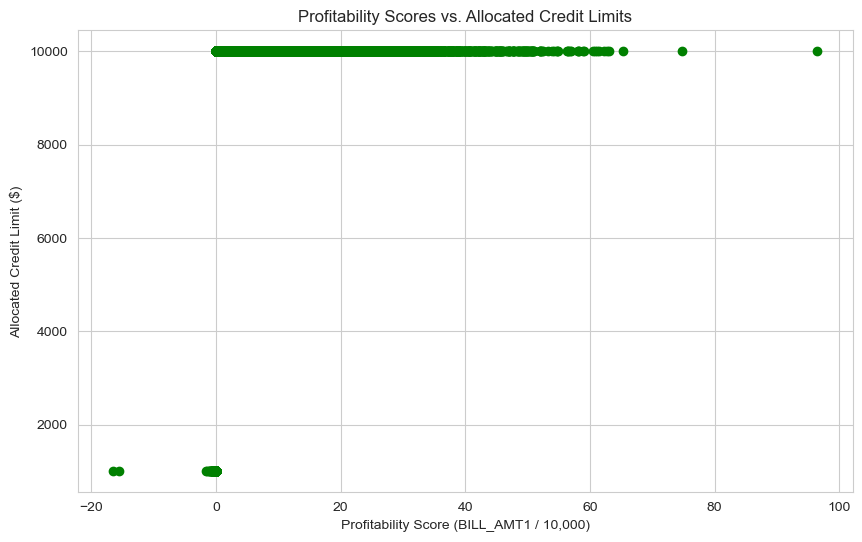

In [121]:
# Plotting profitability scores against allocated credit limits
plt.figure(figsize=(10, 6))
plt.scatter(profit_scores, allocated_limits, color='green')
plt.title('Profitability Scores vs. Allocated Credit Limits')
plt.xlabel('Profitability Score (BILL_AMT1 / 10,000)')
plt.ylabel('Allocated Credit Limit ($)')
plt.grid(True)
plt.show()


# Visualization: Risk and Profitability Impact on Credit Limit Allocation

1. **Purpose**:
   - To analyze how risk scores (`PAY_0`) and profitability scores (`BILL_AMT1 / 10,000`) influence the credit limit allocation.

2. **Steps Performed**:
   - **Scatter Plot**:
     - X-axis: `risk_scores` representing the customer's risk profile.
     - Y-axis: `profit_scores` representing the customer's potential profitability.
   - **Color Coding**:
     - Points are colored based on the allocated credit limits:
       - **Red**: Credit limits above $5,000.
       - **Green**: Credit limits of $5,000 or below.
   - **Customizations**:
     - Added transparency (`alpha=0.5`) for better visualization of overlapping points.
     - Included a color bar to explain the credit limit categories.

3. **Plot Details**:
   - **X-axis**: Represents risk scores (`PAY_0`).
   - **Y-axis**: Represents profitability scores (`BILL_AMT1 / 10,000`).
   - **Color Bar**:
     - Helps interpret the red and green color coding of points.

4. **Output**:
   - A scatter plot where:
     - Each point represents a customer.
     - The position reflects the customer's risk and profitability.
     - The color indicates the allocated credit limit category.

5. **Insights**:
   - Observe trends:
     - Are higher profitability customers allocated higher credit limits?
     - Are riskier customers receiving lower limits?
   - Detect potential anomalies or outliers in credit allocation.

6. **Applications**:
   - Validate the credit limit optimization model.
   - Use insights to refine risk and profitability-based allocation strategies.


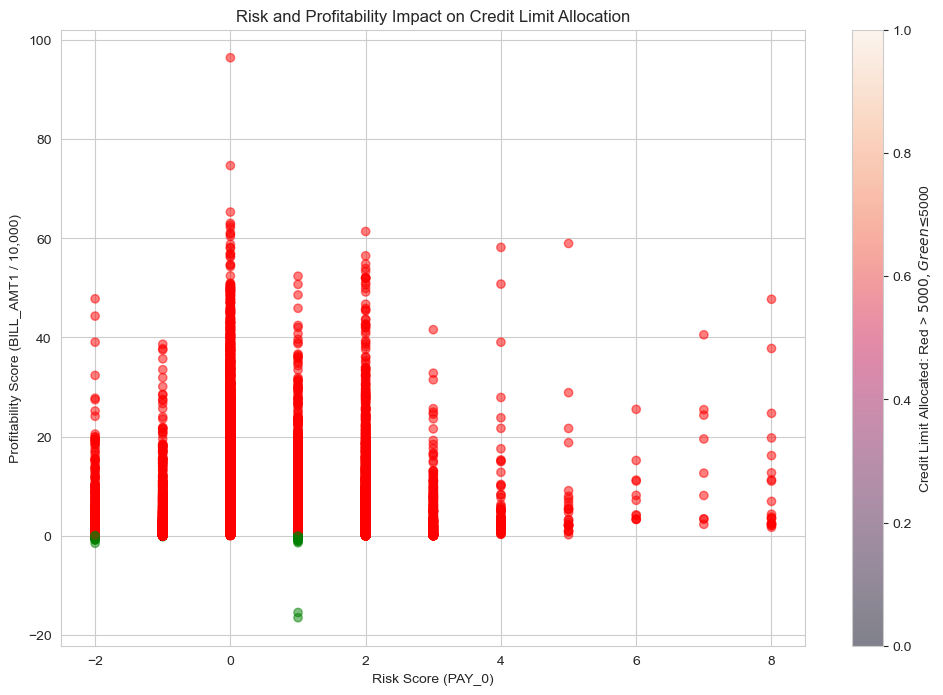

In [123]:
import numpy as np

colors = np.array(['red' if x > 5000 else 'green' for x in allocated_limits])

plt.figure(figsize=(12, 8))
plt.scatter(risk_scores, profit_scores, c=colors, alpha=0.5)
plt.colorbar(label='Credit Limit Allocated: Red > $5000, Green ≤ $5000')
plt.title('Risk and Profitability Impact on Credit Limit Allocation')
plt.xlabel('Risk Score (PAY_0)')
plt.ylabel('Profitability Score (BILL_AMT1 / 10,000)')
plt.grid(True)
plt.show()


In [219]:
print(data[['PAY_0', 'BILL_AMT1']].head())


   PAY_0  BILL_AMT1
0      2       3913
1     -1       2682
2      0      29239
3      0      46990
4     -1       8617


In [221]:
total_credit_budget = 5000000  # Example budget constraint
prob += lpSum([credit_limits[i] for i in data.index]) <= total_credit_budget


In [223]:
for i in range(10):
    print(f"Client {i}: Allocated Credit Limit = ${credit_limits[i].varValue:.2f}")


Client 0: Allocated Credit Limit = $1000.00
Client 1: Allocated Credit Limit = $1000.00
Client 2: Allocated Credit Limit = $1000.00
Client 3: Allocated Credit Limit = $1000.00
Client 4: Allocated Credit Limit = $1000.00
Client 5: Allocated Credit Limit = $1000.00
Client 6: Allocated Credit Limit = $1000.00
Client 7: Allocated Credit Limit = $1000.00
Client 8: Allocated Credit Limit = $1000.00
Client 9: Allocated Credit Limit = $1000.00
